In [1]:
import pandas as pd

In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Dense

In [4]:
dataset = pd.read_csv("wine.csv")

In [5]:
dataset.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [6]:
y=dataset["Wine"]

In [7]:
y.value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [8]:
y_cat = pd.get_dummies(y)

In [9]:
y_cat

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [10]:
y.shape

(178,)

In [11]:
x=dataset[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline']]

In [12]:
x.shape[1]

13

In [13]:
in_shape =x.shape[1]

In [14]:
model = Sequential()

In [15]:
model.add( Dense(
        units = 7,
        input_shape = (in_shape,),
        activation = "relu",
        kernel_initializer = "he_normal"
))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'units': 7,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [18]:
model.add(Dense(
        units = 5,
        activation = "relu",
        kernel_initializer = "he_normal"
))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(Dense(
        units = 5,
        activation = "relu",
        kernel_initializer = "he_normal"
))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(Dense(
    units = 3,
    activation = "softmax"
))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy",metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x , y_cat , epochs = 100 )

Epoch 1/100
6/6 [==============================] - 1s 13ms/step - loss: 21.0123 - accuracy: 0.1517
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 17.5080 - accuracy: 0.0899
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 14.3858 - accuracy: 0.0730
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 11.1050 - accuracy: 0.0618
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 7.6879 - accuracy: 0.0730
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 4.1691 - accuracy: 0.1742
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 1.9252 - accuracy: 0.3989
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 1.9044 - accuracy: 0.5000
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1978 - accuracy: 0.4831
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9014 - accuracy: 0.6348
Epoch 11/100
6/6 [==

6/6 [==============================] - 0s 7ms/step - loss: 0.6419 - accuracy: 0.7584
Epoch 83/100
6/6 [==============================] - ETA: 0s - loss: 0.5761 - accuracy: 0.77 - 0s 25ms/step - loss: 0.6403 - accuracy: 0.7528
Epoch 84/100
6/6 [==============================] - 0s 32ms/step - loss: 0.6201 - accuracy: 0.7697
Epoch 85/100
6/6 [==============================] - 0s 19ms/step - loss: 0.6377 - accuracy: 0.7640
Epoch 86/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6148 - accuracy: 0.7753
Epoch 87/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6315 - accuracy: 0.7753
Epoch 88/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6344 - accuracy: 0.7528
Epoch 89/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6227 - accuracy: 0.7528
Epoch 90/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6317 - accuracy: 0.7865
Epoch 91/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6120 - ac

In [27]:
loss = model.history.history["loss"]

In [28]:
loss_org = pd.DataFrame(loss)

<AxesSubplot:>

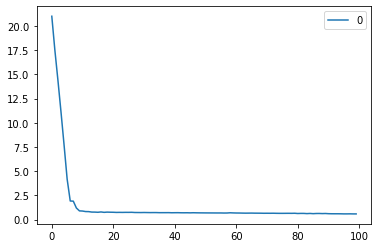

In [29]:
loss_org.plot()

In [30]:
accuracy = model.history.history["accuracy"]

In [31]:
accuracy_org = pd.DataFrame(accuracy)

<AxesSubplot:>

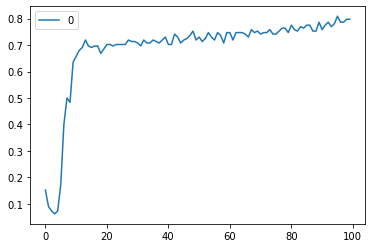

In [32]:
accuracy_org.plot()